# ROS 2 Semantic Reasoning in Robots
This is the repo for SemReBot2, a ROS2 package combining Natural Language Processing, AI planning and robotics to enable semantic reasoning in robots. Specifically, it transforms natural language speech to executable robot actions enabling the possibility to command robots to do what you want. SemReBot2 uses Hugging Face's `transformers`, OpenAI's `Whisper` for automatic speech recognition, Mistral.AI's `Mistral 7B Instruct` in 4-bit precision as language model and `PlanSys2` (https://github.com/PlanSys2/ros2_planning_system) for AI planning and execution of PDDL plans with behaviour trees.

Video demo: https://www.youtube.com/watch?v=13fVo1_BrCg

## Requirements
- Dedicated GPU with min. 9 GB memory
- ~30 GB storage
- CUDA version 11.8+
- Docker
- Python3.8+

## Setup (Ubuntu)
1. Install `pytorch` for `Python 3.8+`
    
    CUDA 11.8
    ```bash
    pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
    ```
    or CUDA 12.1
    ```bash
    pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
    ```
2. Install `transformers`, `bitsandbytes` and `huggingface_hub`
    ```bash
    pip install transformers bitsandbytes huggingface_hub
    ```

3. Clone repo to home directory
    ```bash
    git clone git@github.com:stinkyElias/SemReBot2.git
    ```

5. Create a user on Hugging Face: https://huggingface.co/.

6. Generate an access token by following this tutorial: https://huggingface.co/docs/hub/en/security-tokens

7. Agree to Mistral AI's terms to access Mistral 7B Instruct v0.2: https://huggingface.co/mistralai/Mistral-7B-Instruct-v0.2

8. Authenticate to the hub (scroll down to "Authentication" or check the image below): https://huggingface.co/docs/huggingface_hub/quick-start 

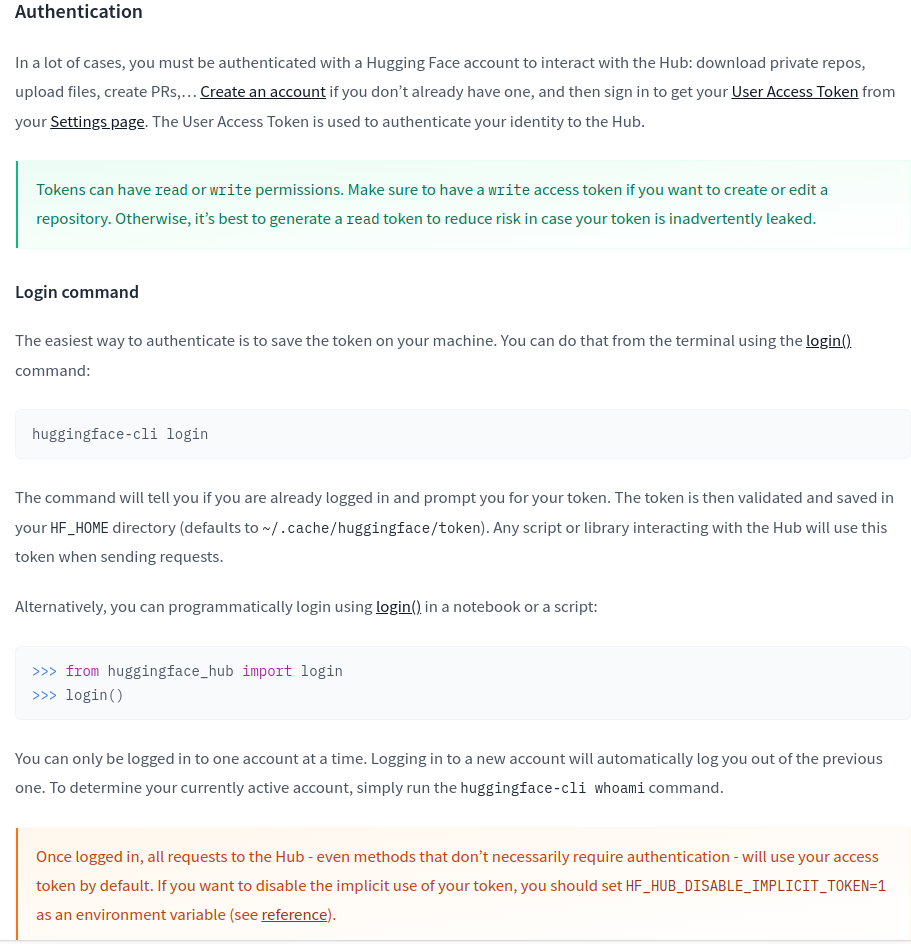

8. Download Whisper large with flash attention and Mistral 7B Instruct in 4-bit precision by running the `download_models.py` script. Provide your HF token as argument.
The default location is `~/semrebot2_models`, but this can be set by adding a user-specific path as command line argument. _The models take up ~18 GB of storage_

    Default location:
    ```bash
    python3 download_models.py "hugging_face_access_token"
    ```
    User-specified location:
    ```bash
    python3 download_models.py "hugging_face_access_token" "relative/path/to/location"
    ```

9. Pull Docker image from Docker Hub
    ```bash
    docker pull stinkyelias/rolling:whisper
    ```

10. To start the container, run `run.sh` bash script in terminal 1
    
    Terminal 1:
    ```bash
    cd SemReBot2
    ./run.sh
    ```

11. Build the ROS2 packages inside the container. Remember to source the workspace afterwards
    Terminal 1:
    ```bash
    ./env.sh
    ```
    ```bash
    source install/setup.bash
    ```

This setup of SemReBot2 requires four terminal windows. After step 11, start three new terminals. You can easily attach to the running container by first retrieving the container name.

Terminal 2:
```bash
docker container list
```
`>>> some_container_name`

12. Attach three terminals to the running container
    
    Terminal 2:
    ```bash
    ./terminal some_container_name
    ```
    Terminal 3:
    ```bash
    ./terminal some_container_name
    ```
    Terminal 4:
    ```bash
    ./terminal some_container_name
    ```
    If Terminal 1 has finished building the ROS2 packages, remember to source each terminal!
    ```bash
    source install/setup.bash
    ```
## Test run
1. With all four terminals running, bring up SemReBot2, Task controller node and Nav2 sim node
    Terminal 1:
    ```bash
    ros2 launch semrebot2_bringup bringup.launch.py
    ```
    Terminal 2:
    ```bash
    ros2 run semrebot2_task_controller task_controller_node
    ```
    Terminal 3:
    ```bash
    ros2 run semrebot2_task_controller nav2_sim_node
    ```
2. To use one of the four audio samples, publish to the `/speech` topic the audio file you wish to test. Audio file 3 contain logical inconsistencies not possible to solve!
    Terminal 4:
    ```bash
    ros2 topic pub --once /speech std_msgs/msg/Int8 "{data: x}"
    ```
    where 1 <= x <= 4

